In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings('ignore')
# Setting styles
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('covid_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228983 entries, 0 to 228982
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    228983 non-null  object 
 1   continent                                   216050 non-null  object 
 2   location                                    228983 non-null  object 
 3   date                                        228983 non-null  object 
 4   total_cases                                 215997 non-null  float64
 5   new_cases                                   215741 non-null  float64
 6   new_cases_smoothed                          214545 non-null  float64
 7   total_deaths                                196813 non-null  float64
 8   new_deaths                                  196763 non-null  float64
 9   new_deaths_smoothed                         195583 non-null  float64
 

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.159970e+05,2.157410e+05,2.145450e+05,1.968130e+05,196763.000000,195583.000000,215010.000000,214754.000000,213563.000000,195839.000000,...,137823.000000,90864.000000,164280.000000,210425.000000,180056.000000,2.279960e+05,7.686000e+03,7686.000000,7736.00000,7686.000000
mean,4.410898e+06,1.239274e+04,1.242634e+04,7.380919e+04,138.777138,139.447612,59770.411473,189.241267,189.694942,688.702936,...,32.809916,50.927258,3.089017,73.618181,0.724799,1.399627e+08,4.785388e+04,9.876106,14.34651,1333.351425
std,2.758180e+07,8.540771e+04,8.345873e+04,3.796541e+05,731.163458,716.731854,106030.314864,1051.118995,667.604726,974.298736,...,13.534790,31.881740,2.552304,7.446234,0.149609,6.876194e+08,1.325075e+05,13.511560,26.39345,1716.352492
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.92000,-1884.678982
25%,4.294000e+03,0.000000e+00,6.000000e+00,1.130000e+02,0.000000,0.000000,1078.953500,0.000000,1.342000,29.353000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,3.152500e+01,0.510000,-0.10250,25.171627
50%,4.865800e+04,5.400000e+01,9.457100e+01,1.169000e+03,1.000000,1.571000,10246.401500,7.571000,19.349000,212.240000,...,31.400000,49.839000,2.500000,75.050000,0.742000,6.885868e+06,5.874900e+03,7.390000,7.33000,793.369452
75%,5.186320e+05,9.600000e+02,1.129286e+03,9.726000e+03,14.000000,15.857000,72152.583000,97.338000,135.787000,1019.907000,...,41.300000,83.241000,4.200000,79.070000,0.845000,3.298164e+07,3.451410e+04,15.530000,19.81000,2079.898586
max,6.267835e+08,4.081954e+06,3.436022e+06,6.575340e+06,17731.000000,14857.714000,662430.093000,195005.313000,36401.607000,6432.566000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.909295e+09,1.224011e+06,76.550000,376.51000,9766.306877


In [7]:
print(f"shape before processing: {df.shape[0]} : {df.shape[1]}")

shape before processing: 228983 : 67


In [8]:
#remove columns missing 60% or more values
cleanDF = df.dropna(thresh=df.shape[0] * 0.6, axis=1)
cleanDF.shape

(228983, 31)

In [9]:
#drop missing values
cleanDF.dropna(inplace=True)
cleanDF.shape

(109240, 31)

In [10]:
#drop columns with smoothed in their name
cleanDF = cleanDF[cleanDF.columns.drop(list(cleanDF.filter(regex='smoothed')))]
cleanDF.shape

(109240, 27)

In [11]:
# setting date as the index
cleanDF.date = pd.to_datetime(cleanDF.date)
cleanDF.set_index('date', inplace=True)
cleanDF.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
date,,,,,,,,,,,,,,,,,,,,,
2020-03-24,ALB,Europe,Albania,123.0,19.0,5.0,1.0,43.087,6.656,1.751,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2854710.0
2020-03-25,ALB,Europe,Albania,146.0,23.0,5.0,0.0,51.144,8.057,1.751,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2854710.0
2020-03-26,ALB,Europe,Albania,174.0,28.0,6.0,1.0,60.952,9.808,2.102,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2854710.0
2020-03-27,ALB,Europe,Albania,186.0,12.0,8.0,2.0,65.155,4.204,2.802,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2854710.0
2020-03-28,ALB,Europe,Albania,197.0,11.0,10.0,2.0,69.009,3.853,3.503,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2854710.0


In [12]:
# confirming that we do not have any NA values
cleanDF.isna().sum(numeric_only = True)
covid_data = cleanDF.copy() # better name

## plotting


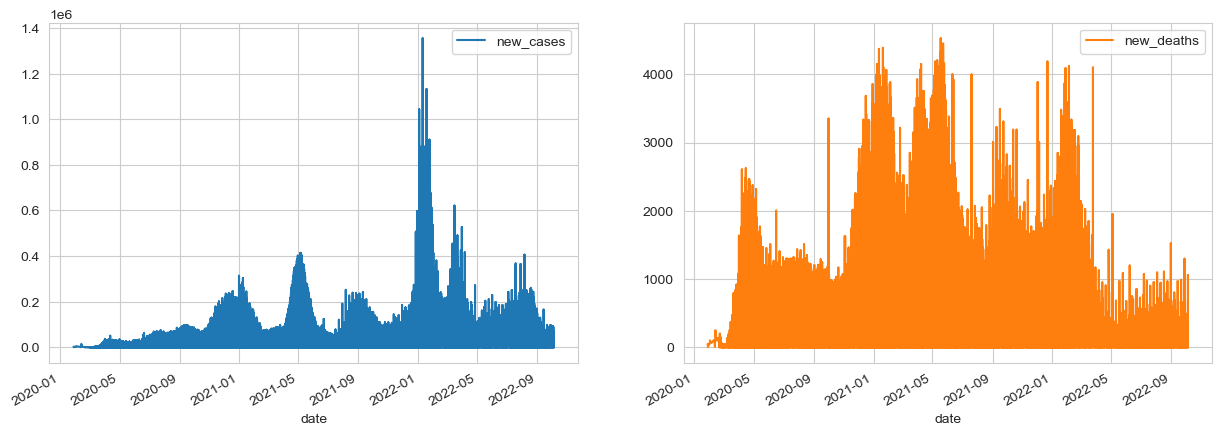

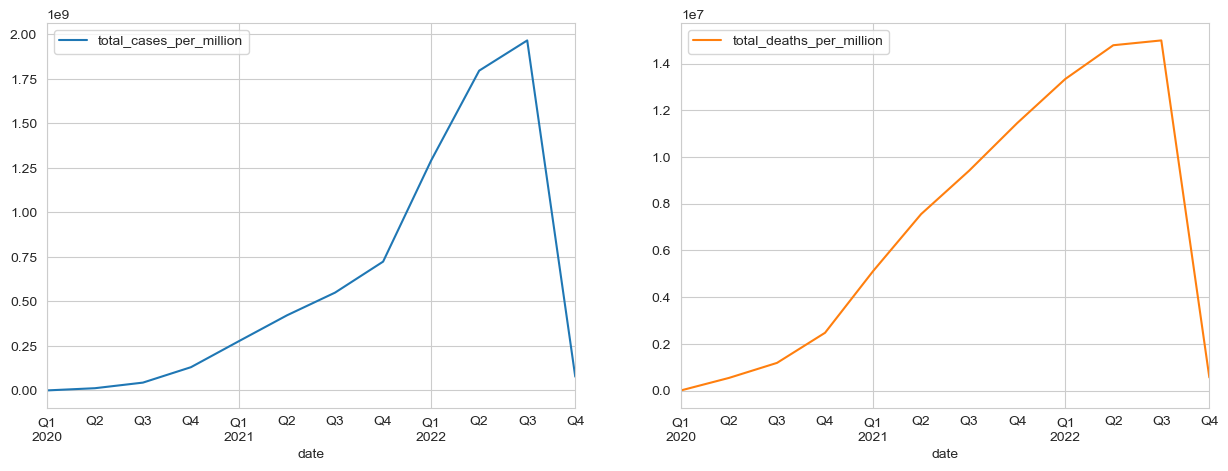

In [13]:
# Create some lists of columns which will be used a lot
total = ['total_cases','total_deaths']
millions = ['total_cases_per_million','total_deaths_per_million']
new = ['new_cases','new_deaths']

# Gather key data for the plots
covid_new_data = covid_data[new]
covid_total_millions_data = covid_data[millions].resample('Q').sum()
covid_new_data.plot(figsize=(15,5),subplots=True,layout=(1,2))
covid_total_millions_data.plot(figsize=(15,5),subplots=True,layout=(1,2))
plt.show()

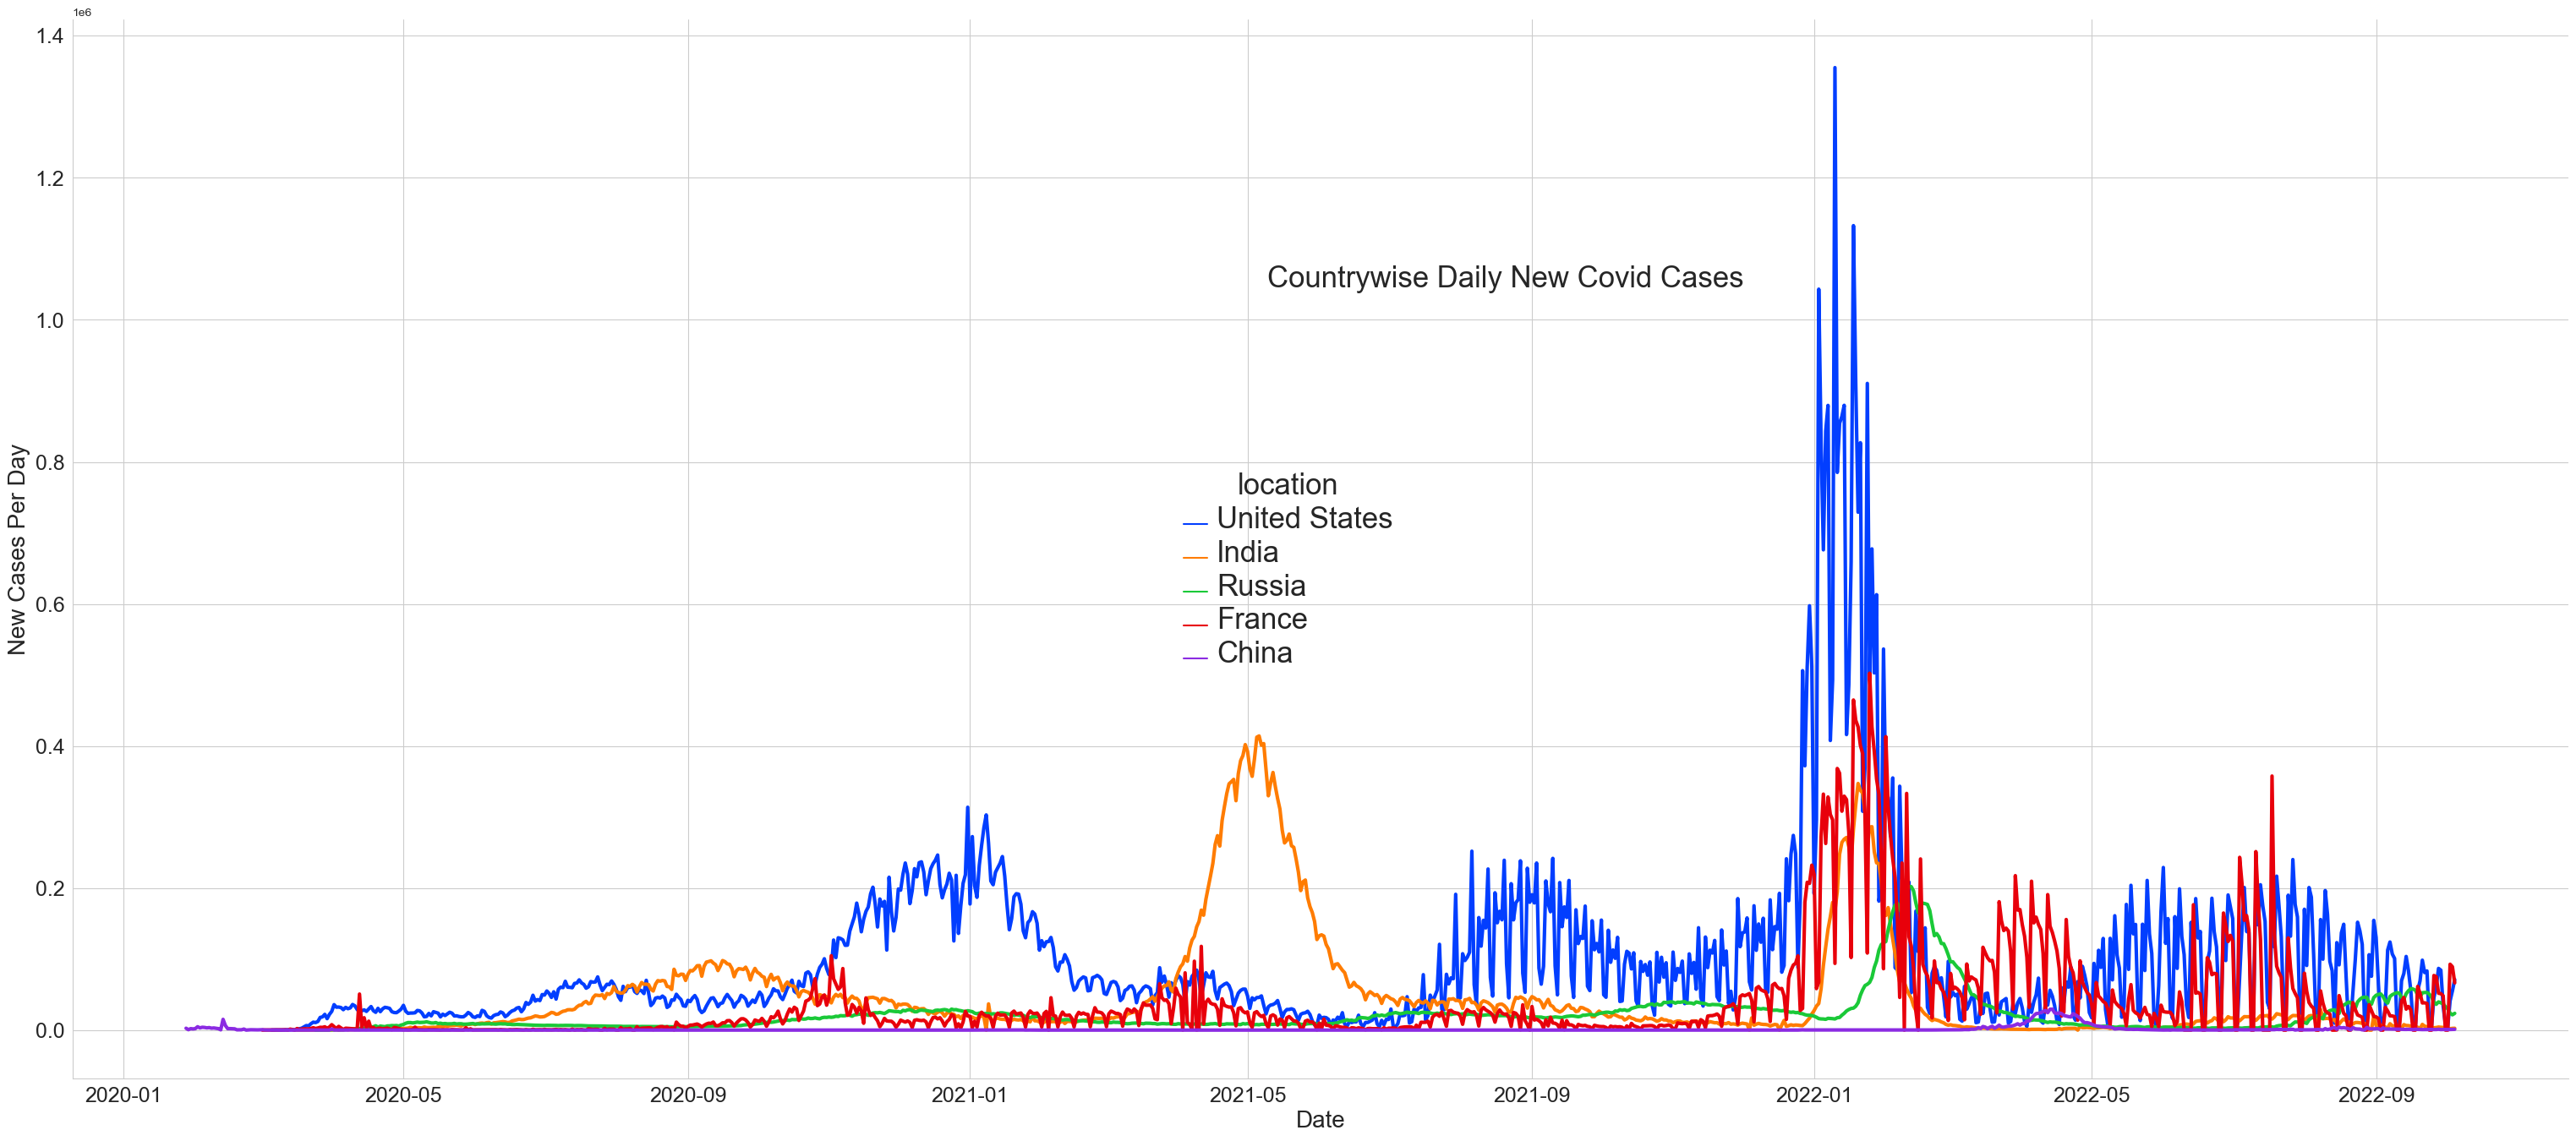

In [15]:
# Separate out the data of USA, India, Russia, France, China

countries = ['United States', 'India', 'Russia', 'France', 'China']    # Create a list of the countries of interest

covid_countrwise_data = covid_data.loc[covid_data['location'].isin(countries)] # Filter the dataframe to get values of these countries

c = sns.relplot(data=covid_countrwise_data,x=covid_countrwise_data.index, y='new_cases', kind='line',hue='location',hue_order=countries,palette = "bright",ci=None,linewidth=3)
c.fig.set_size_inches(45,15)

# Setting seaborn printing parameters
c.fig.set_size_inches(45,15)  # Size of the chart
leg = c._legend # The legend object
sns.move_legend(c, "center") # Locating the legend
plt.setp(c._legend.get_title(), fontsize=25) # Legend title fontsize setting
plt.setp(c._legend.get_texts(), fontsize=25) # Legend texts fontsize setting
c.set_xlabels('Date',fontsize=20) # Set xlabels and their fontsize
c.set_ylabels('New Cases Per Day',fontsize=20) # Set ylabels and their fontsize
c.tick_params(axis='both', which='major', labelsize=18) # Set size if values on the axis

c.fig.suptitle("Countrywise Daily New Covid Cases",y=0.75,fontsize=25)
plt.show()

#### Q5 - Method 2 ####

The chart is crowded and we can smooth it out by using, say, a 2 or 3 day mean so that we can see the relationships more clearly. You can experiemnt with the number of days of smoothing.

Text(0.5, 0.65, 'Countrywise New Covid Cases with 3D smoothing')

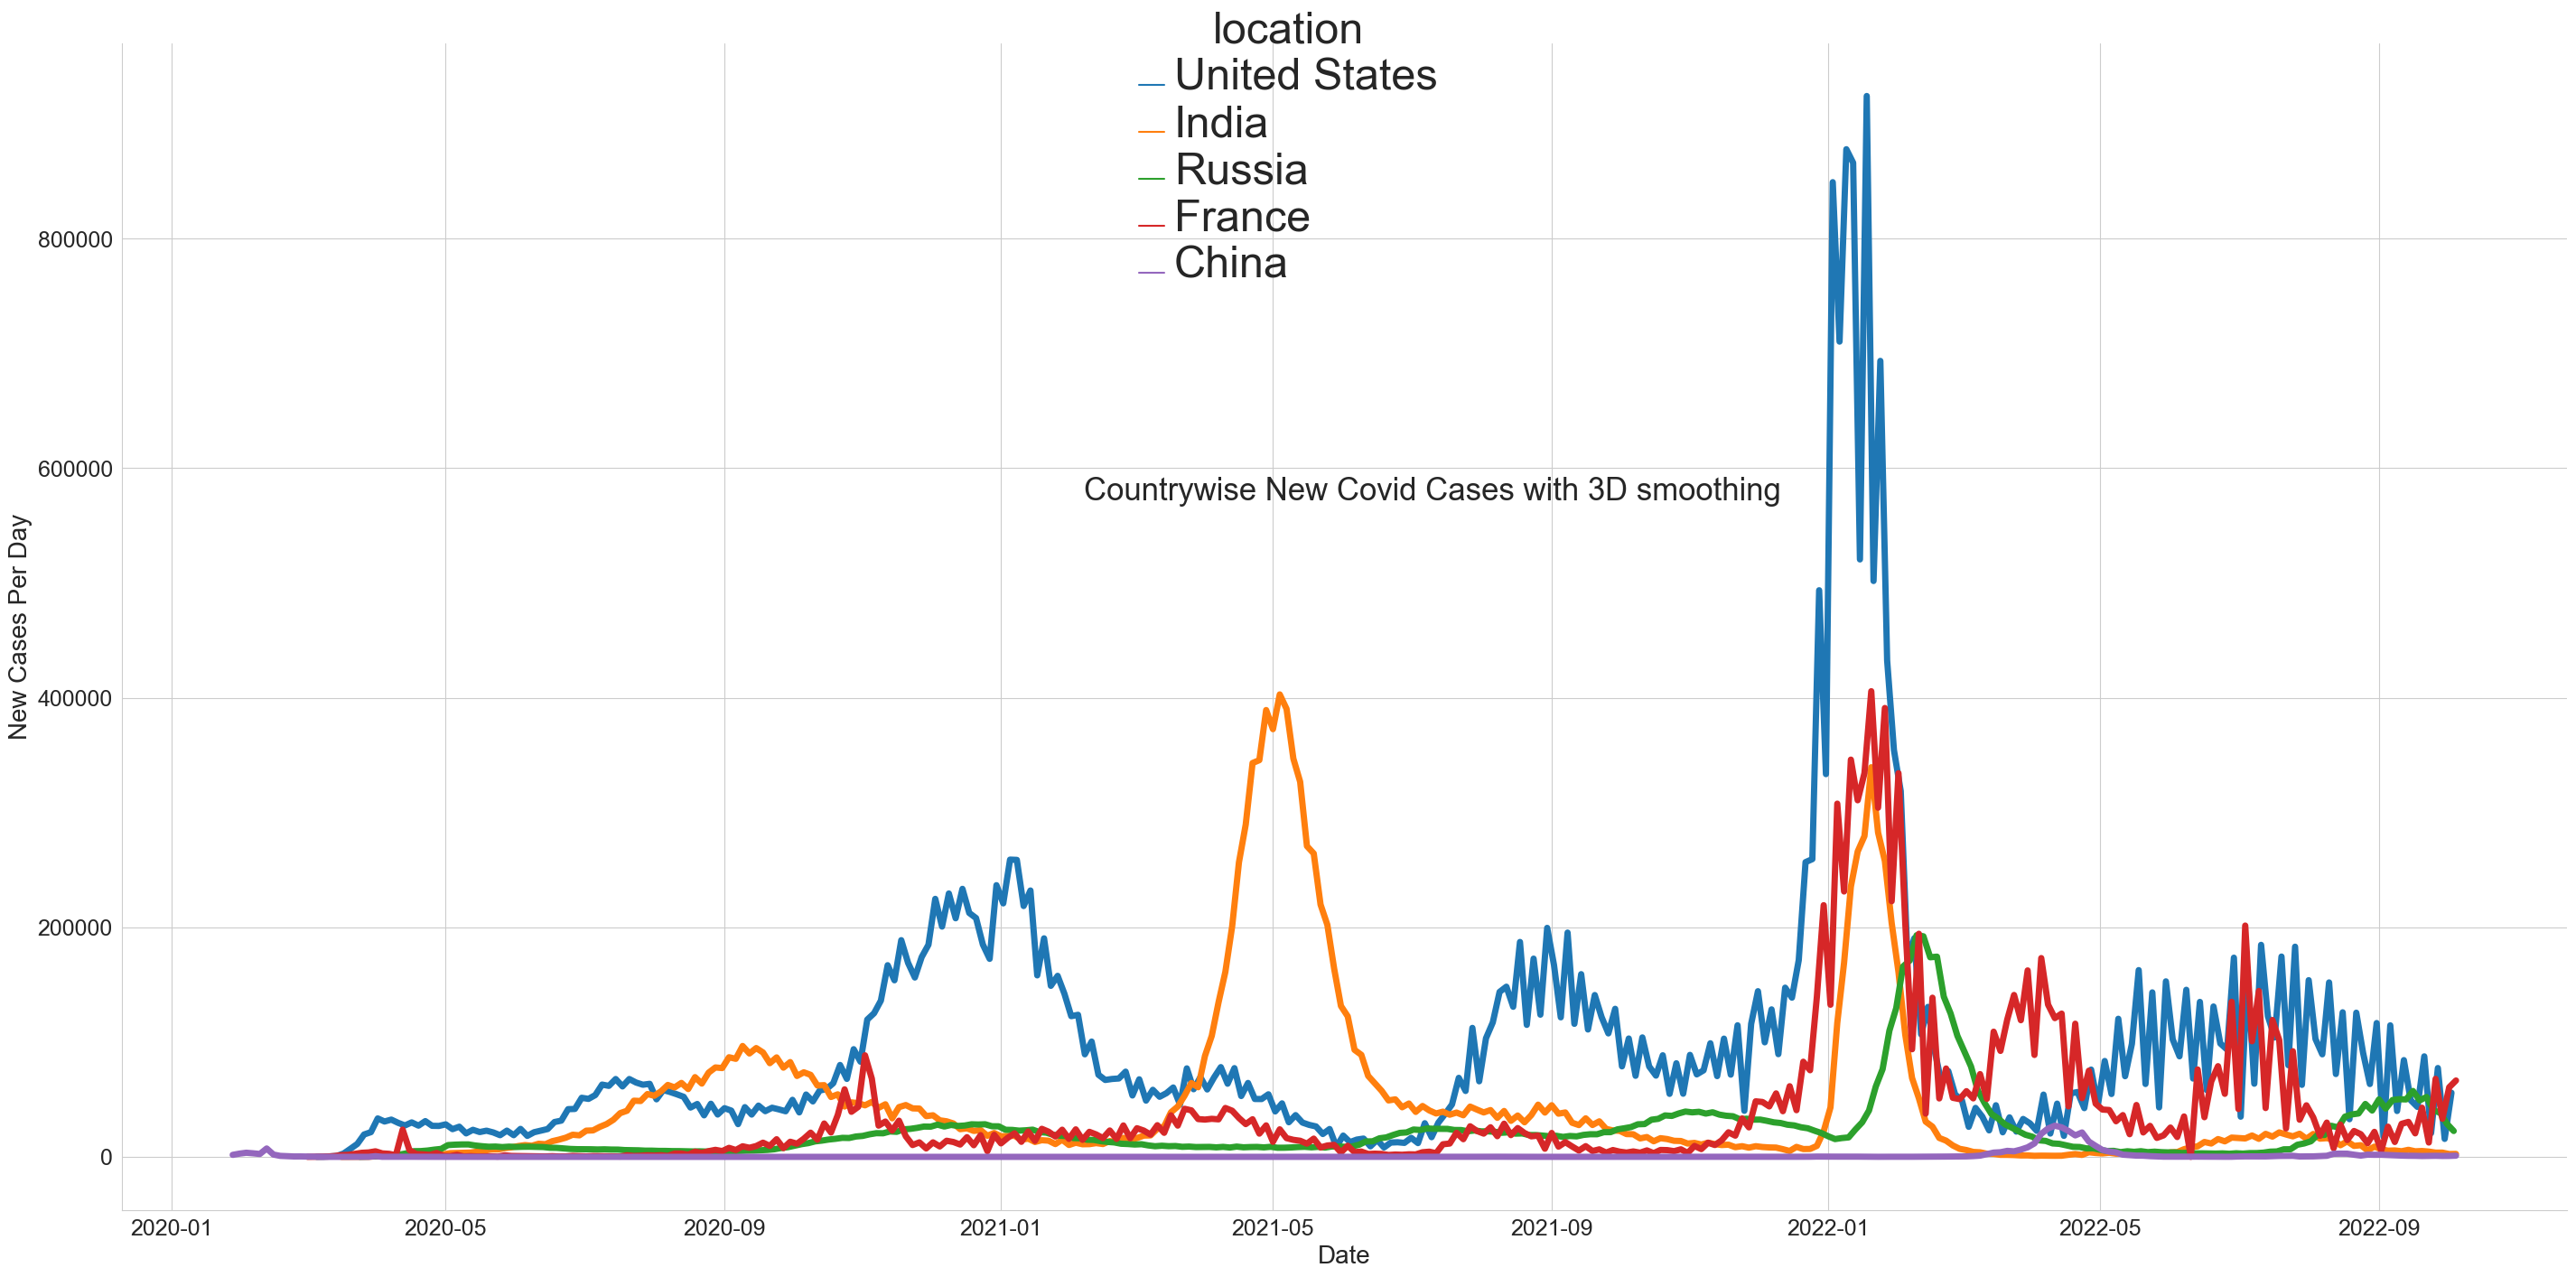

In [16]:
covid_3D_Data = covid_data.loc[covid_data['location'].isin(countries)]
covid_3D_Data = covid_3D_Data.groupby('location').resample('3D').mean()

c3d = sns.relplot(data=covid_3D_Data.reset_index(),x='date',y='new_cases',kind='line',hue='location',hue_order=countries,linewidth=5,ci=None)

# Setting seaborn printing parameters
c3d.fig.set_size_inches(45,15)  # Size of the chart
leg = c3d._legend # The legend object
sns.move_legend(c3d, "upper center") # Locating the legend
plt.setp(c3d._legend.get_title(), fontsize=35) # Legend title fontsize setting
plt.setp(c3d._legend.get_texts(), fontsize=35) # Legend texts fontsize setting
c3d.set_xlabels('Date',fontsize=20) # Set xlabels and their fontsize
c3d.set_ylabels('New Cases Per Day',fontsize=20) # Set ylabels and their fontsize
c3d.tick_params(axis='both', which='major', labelsize=18) # Set size if values on the axis

c3d.fig.suptitle("Countrywise New Covid Cases with 3D smoothing",y=0.65,fontsize=25)

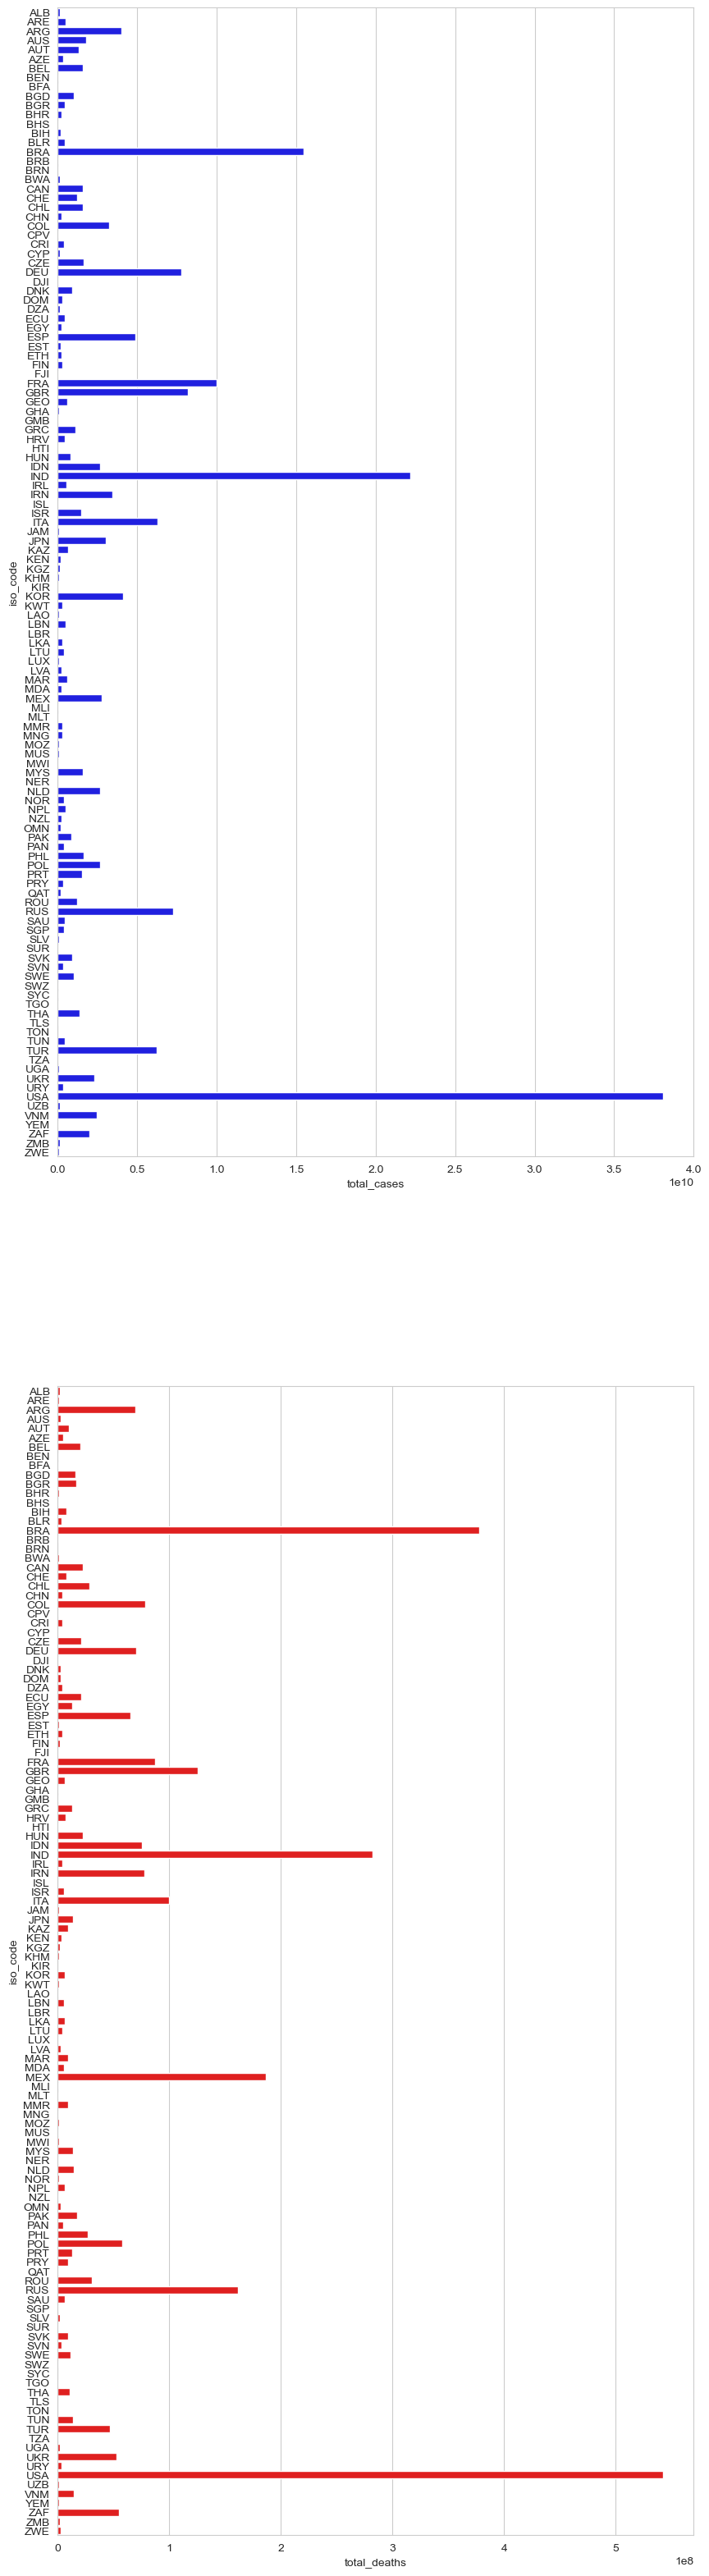

In [17]:
# Groupby on iso_code to get the countires as index

covid_iso = covid_data.groupby('iso_code').sum()

# Create axes for subplots
fig,ax = plt.subplots(2,1,figsize=(10,40))
ax1 = sns.barplot(data=covid_iso, x='total_cases', y=covid_iso.index,color='b',ax=ax[0])    # Subplot 1
ax2 = sns.barplot(data=covid_iso, x='total_deaths', y=covid_iso.index,color='r',ax=ax[1])   # Subplot 2
plt.show()